**Author:** Jazi Joseph 
**Date:** February 2026  

## Objective
- **Analyze sales data to identify revenue drivers, customer segments, and product performance for strategic decision-making.**

### ============================================================
### **Executive Report – RevenueLens: Sales Analytics & Prediction Purpose**

##### **This project analyzed transaction-level sales data to uncover:**

##### Revenue trends over time

##### Customer demographics and segments

##### Product category performance

##### Geographic sales distribution

##### Forecasts of future revenue

##### *The goal was to turn raw data into actionable business insight*

##### **Key Findings**

##### 1. Customer Insights

##### Majority of customers fall in the 25–40 age group, making them the most profitable demographic.

##### Gender distribution is balanced, with both male and female customers contributing significantly.

#### 2. Product Performance

##### Accessories dominate in transaction volume but deliver lower margins.

##### Clothing has fewer transactions but higher profitability, suggesting strong potential for margin growth.

##### Subcategories like Tires and Tubes and Gloves appear frequently, but profitability varies.

#### 3. Geographic Trends

##### Washington and California lead in revenue generation.

##### European regions (UK, Germany, France) show moderate but growing activity.

##### Concentrating marketing spend in high-performing states could yield immediate returns.

#### 4. Profitability Risks

##### Some transactions show negative profit margins, likely due to discounts, pricing errors, or cost misallocations.

##### These need investigation to prevent revenue leakage.

#### 5. Seasonality

##### Revenue peaks in June and December, aligning with promotional cycles and holiday demand.

##### Planning campaigns around these months maximizes impact.

### **Forecast Insights**

### Using ARIMA forecasting:

##### Revenue shows recurring seasonal peaks in June and December.

##### Growth is steady but volatile, meaning revenue increases don’t always translate into profit.

##### Current ARIMA model accuracy:

##### MAE: ~638k average monthly error

##### MAPE: ~86% (high error, indicating the need for model refinement)

### **Recommendations**

##### Expand marketing in Washington & California to consolidate geographic advantage.

##### Prioritize Clothing promotions to leverage higher margins.

##### Target campaigns at the 25–40 age group, the most profitable demographic.

##### Investigate negative profit transactions to reduce leakage.

##### Align promotions and inventory planning with seasonal peaks in June and December.

##### Refine forecasting models (seasonal ARIMA or Prophet) to improve accuracy and reliability.

### **Conclusion**
##### RevenueLens successfully transformed raw sales data into strategic insights. The analysis highlights where profits are strongest, where risks exist, and how future demand will unfold. By acting on these recommendations, leadership can strengthen profitability, optimize marketing spend, and plan more effectively for seasonal demand
#### ==========================================================

## <u>**Experiments to Unlock Insights**</u>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_clean_data(path):
    df = pd.read_csv(path)
    

    
    return df

df = load_and_clean_data("C:/Users/HP/Downloads/project_data/SalesForCourse_quizz_table.csv")
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [ ]:
df.drop(columns={'index'},inplace=True)

In [5]:
df.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [6]:
df.drop(columns={'Column1'},inplace=True)

In [7]:
df.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
df.drop(columns='Year',inplace=True)


In [10]:
df.head()

,Date,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2016-02-19,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,2016-02-20,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2016-02-27,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,2016-03-12,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,2016-03-12,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


In [11]:
df.isna().sum()

Date                1
Month               1
Customer Age        1
Customer Gender     1
Country             1
State               1
Product Category    1
Sub Category        1
Quantity            1
Unit Cost           1
Unit Price          1
Cost                1
Revenue             0
dtype: int64

In [12]:
df['Customer Age'] = df['Customer Age'].fillna(df['Customer Age'].median())
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())
df['Unit Cost'] = df['Unit Cost'].fillna(df['Unit Cost'].median())
df['Unit Price'] = df['Unit Price'].fillna(df['Unit Price'].median())
df['Cost'] = df['Cost'].fillna(df['Cost'].median())
for col in ['Customer Gender','Country','State','Product Category','Sub Category','Month','Date']:
        df[col] = df[col].fillna(df[col].mode()[0])

In [40]:
df.isna().sum()

Date                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(1)

In [14]:
dfs=df.drop_duplicates()

In [15]:
dfs.head()

,Date,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2016-02-19,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,2016-02-20,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2016-02-27,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,2016-03-12,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,2016-03-12,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


In [17]:
dfs=dfs.copy()

In [18]:
dfs['Profit']=dfs['Revenue']-dfs['Cost']

In [19]:
dfs.head()

,Date,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
0,2016-02-19,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,29.0
1,2016-02-20,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,8.0
2,2016-02-27,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,4.0
3,2016-03-12,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,58.0
4,2016-03-12,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,20.0


In [41]:
dfs['day'] = dfs['Date'].dt.day
dfs['month'] = df['Date'].dt.month 
dfs['year'] = dfs['Date'].dt.year

In [42]:
dfs.head()

,Date,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit,Age Group,day,month,year
0,2016-02-19,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,29.0,25-34,19,2,2016
1,2016-02-20,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,8.0,25-34,20,2,2016
2,2016-02-27,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,4.0,25-34,27,2,2016
3,2016-03-12,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,58.0,25-34,12,3,2016
4,2016-03-12,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,20.0,25-34,12,3,2016


In [43]:
dfs.dtypes

Date                datetime64[ns]
Month                       object
Customer Age               float64
Customer Gender             object
Country                     object
State                       object
Product Category            object
Sub Category                object
Quantity                   float64
Unit Cost                  float64
Unit Price                 float64
Cost                       float64
Revenue                    float64
Profit                     float64
Age Group                 category
day                          int32
month                        int32
year                         int32
dtype: object

In [44]:
dfs.describe()

,Date,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit,day,month,year
count,34866,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000
mean,2016-01-19 18:43:25.678884864,36.382665,2.002524,349.884582,389.237218,576.011444,640.887671,64.876227,15.667355,6.317702,2015.569265
min,2015-01-01 00:00:00,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,-937.000000,1.000000,1.000000,2015.000000
25%,2015-10-26 00:00:00,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,5.000000,8.000000,3.000000,2015.000000
50%,2016-01-28 00:00:00,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,27.000000,16.000000,6.000000,2016.000000
75%,2016-04-26 00:00:00,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,96.000000,23.000000,9.000000,2016.000000
max,2016-07-31 00:00:00,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,1842.000000,31.000000,12.000000,2016.000000
std,NaN,11.112848,0.813936,490.013634,525.316454,690.496036,736.643285,152.888952,8.771007,3.465351,0.495186


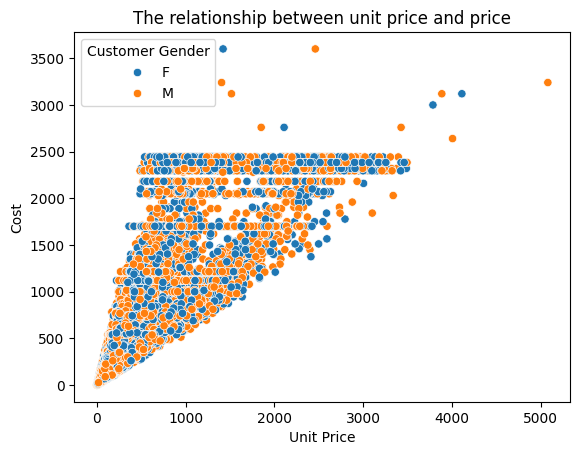

In [40]:
sns.scatterplot(x=dfs['Unit Price'],y=dfs['Cost'],hue=dfs['Customer Gender'])
plt.title('The relationship between unit price and price')
plt.show()

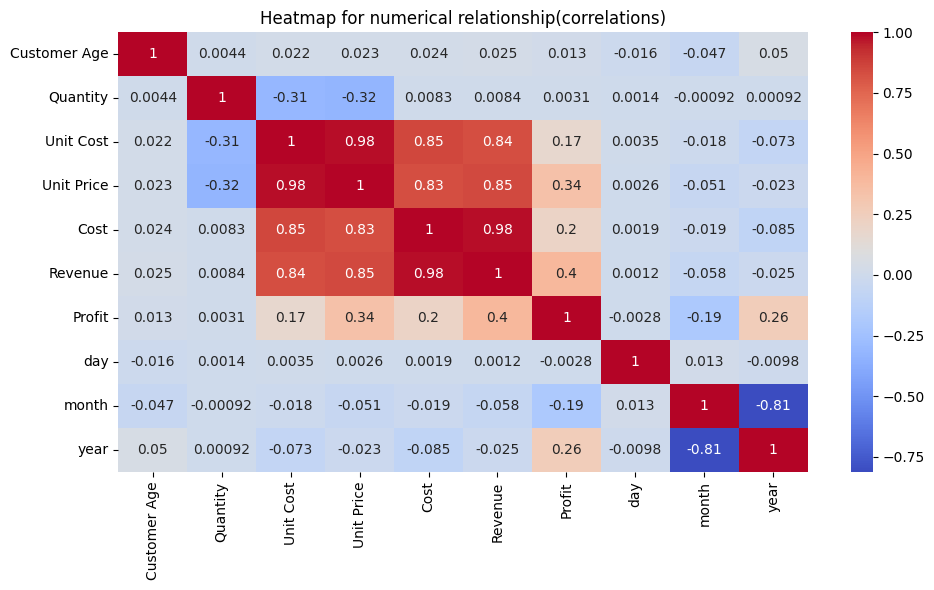

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(dfs.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Heatmap for numerical relationship(correlations)')
plt.tight_layout()

##### There is high correlation between Unit Cost and Unit Price,cost and Unit Price,Revenue and Unit Price,Revenue and Cost,These values have high correlaion because they depend on each other ,which make this project suitable for Regression models

<Figure size 1000x600 with 0 Axes>

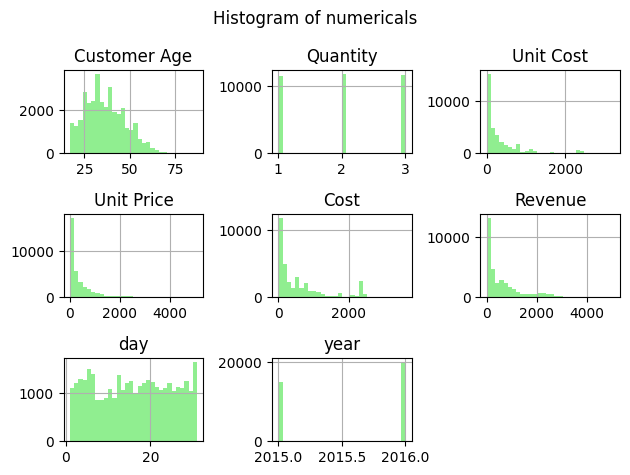

In [27]:
plt.figure(figsize=(10,6))
c.hist(bins=30,color='lightgreen')
plt.suptitle('Histogram of numericals')
plt.tight_layout()
plt.show()

### Objective
###### -To See the distribution of all transactions in categorical columns

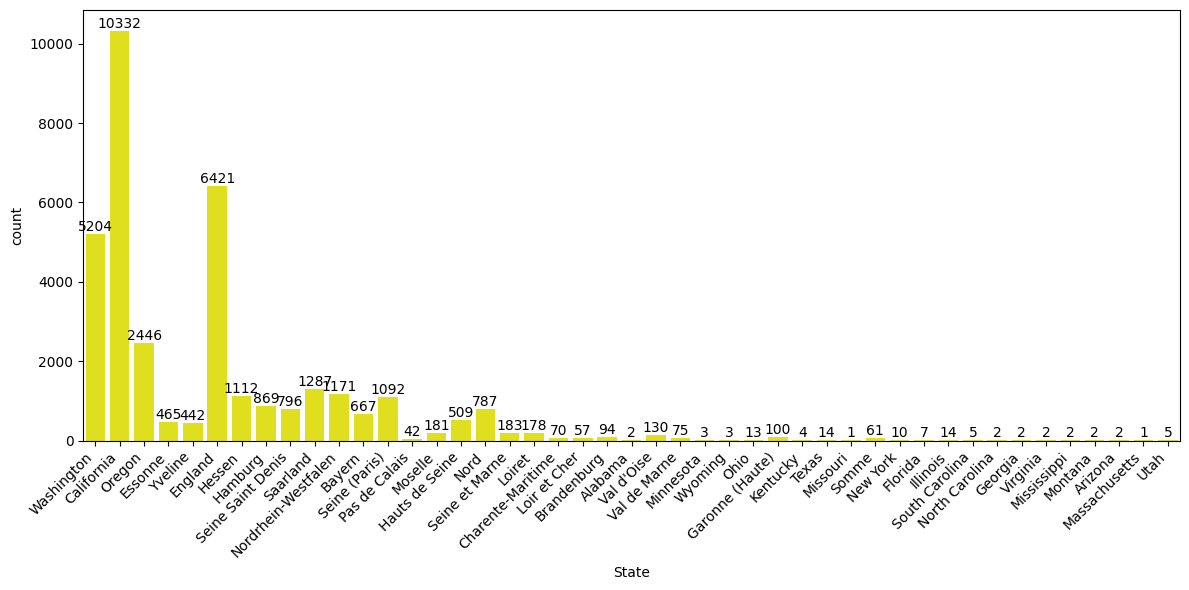

In [31]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x=c['State'],color='yellow')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
for container in ax.containers:
        ax.bar_label(container,fmt='%d',label_type='edge',padding=0)


#### Insights1:There more sales in the months of June,May and December respectively and slighly low in September and July
#### Recommendation:1
#### Reward frequent buyers with escalating benefits for deep connection and strong retention and in September and July offers discounts to encourages more sales
#### Insight:2 Total number of male(17805) and female(17060) are almost same
#### insight:3 there were more sales in United States(18076) and low salses in Germany (5200)and France(5168)
#### insight:4 the states of califonia had more sales of(10332) in the United States and low sales in  states such as Virginia with(2), Arizona(1)
#### insight5:more sales were generated in the category of Accessories(22533)and low in Clothing(5239)
#### insight6:more salses in the subcategory of Tires and Tubes(11112) and low in Bike Racks(103)


<Axes: title={'center': 'Profit by Category'}, xlabel='Product Category'>

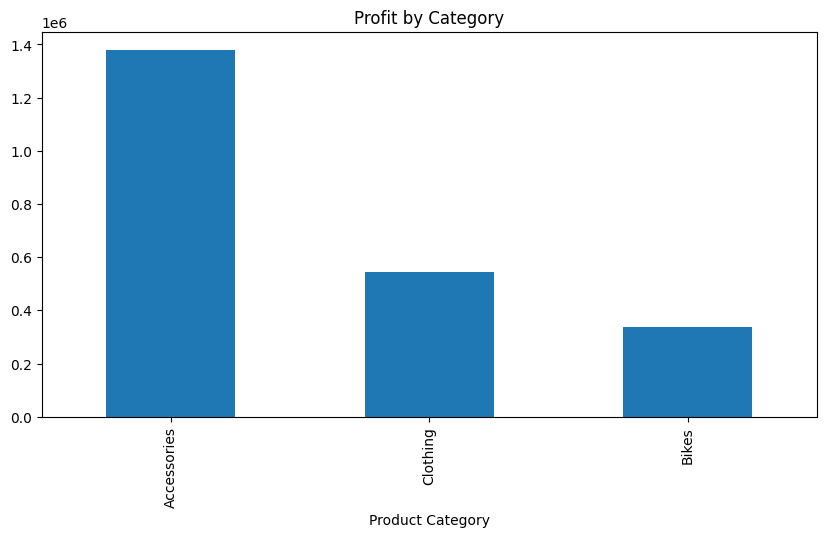

In [31]:
profit_by_category = c.groupby('Product Category')['Profit'].sum().sort_values(ascending=False)
profit_by_category.plot(kind='bar', figsize=(10,5), title="Profit by Category")


### Insight
###### Accessories are the drivers of the profit followed by Clothing and finally the Bikes,however Bikes dorminates more in number of transactions than clothing

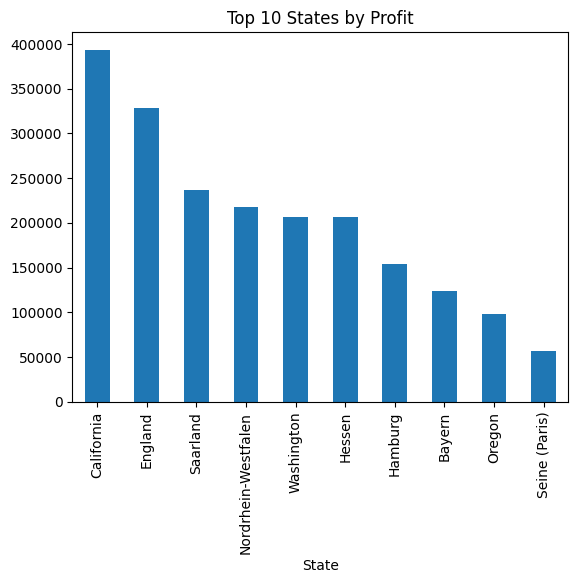

In [25]:
    # Profit by state
    state_profit = dfs.groupby('State')['Profit'].sum().sort_values(ascending=False)
    state_profit.head(10).plot(kind='bar', title="Top 10 States by Profit")
    plt.show()

In [28]:
#Age segmentation 
bins = [0,25,35,45,60,100]
labels = ['<25','25-34','35-44','45-59','60+'] 
dfs['Age Group'] = pd.cut(dfs['Customer Age'], bins=bins, labels=labels)

In [29]:
dfs.head()

,Date,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit,Age Group
0,2016-02-19,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,29.0,25-34
1,2016-02-20,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,8.0,25-34
2,2016-02-27,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,4.0,25-34
3,2016-03-12,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,58.0,25-34
4,2016-03-12,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,20.0,25-34


Text(0.5, 1.0, 'The Inflows of Revenues within months ')

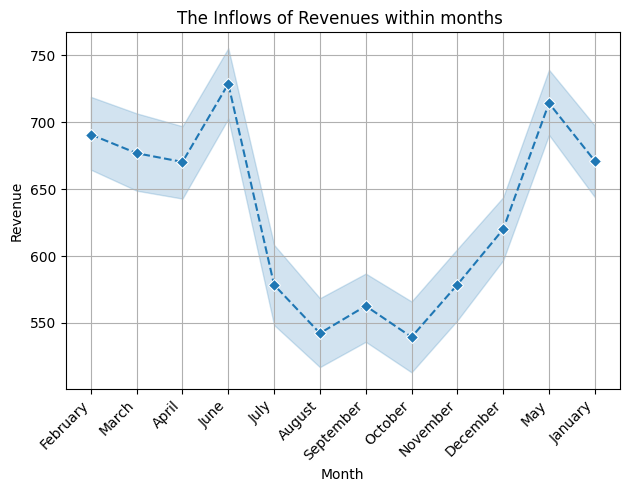

In [36]:
sns.lineplot(x=dfs['Month'],y=dfs['Revenue'],marker='D',ls='--')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.grid()
plt.title('The Inflows of Revenues within months ')

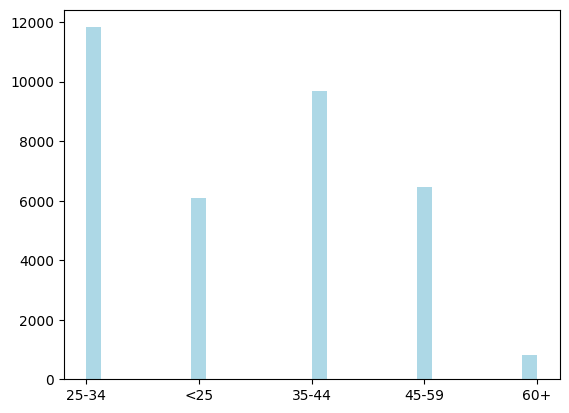

In [35]:
plt.hist(dfs['Age Group'],bins=30, color='lightblue') 
plt.show()

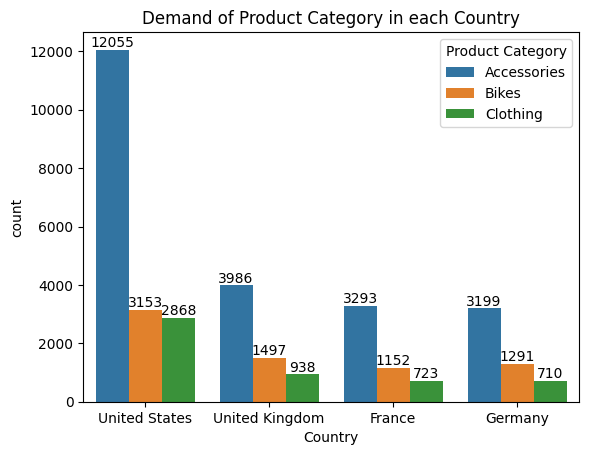

In [47]:
n=c[['Country','Product Category']].value_counts().reset_index(name='count')
ax=sns.barplot(data=n,x=n['Country'],y='count',hue=n['Product Category'])
for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=0)
    plt.title('Demand of Product Category in each Country')

##### There is more sales in United States  mainly in the Accesories category,followed by a balanced demand of Bikes and clothes,secondly Germany, France and United Kingdom more sales in Accesories followed by Bikes and low sales from Clothes.To all these country the stock of Accesories should available in large quantity in order to satisfy the needs of customers 

##### There is more demand of Accesories in Califonia and also leading Bikes and Clothes but in low demand than Accesories,followed by England and Washingtone more demand in Accesories and follwed by Bikes and Clothes. The worst performing States are Arizona,Mississipi,Missouri,Wyoming,To boost sales in worst perfomance the business should promote their products via adivertising and offfering discounts and keep stock avilable to good performing States

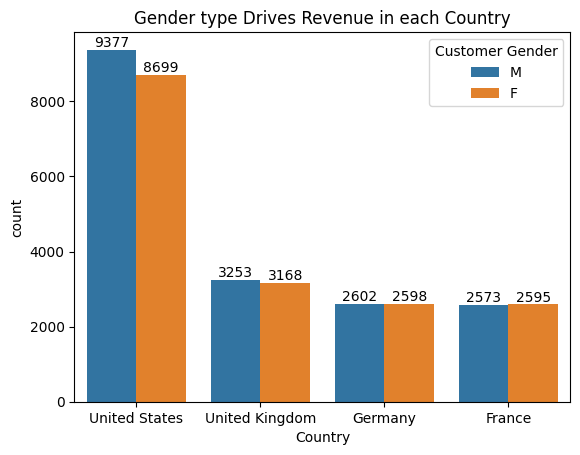

In [48]:
n=c[['Customer Gender','Country']].value_counts().reset_index(name='count')
ax=sns.barplot(data=n,x=n['Country'],y='count',hue=n['Customer Gender'])
for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=0)
    plt.title('Gender type Drives Revenue in each Country')

##### There is more customer base in United States which promotes high sales followed by UK,Germany and lastly in France .Therefore the business should use pricing strategies such as pernatration pricing to attract large customers and the business should adopt to USA strategies in other Countries so that there is more sales to all countries

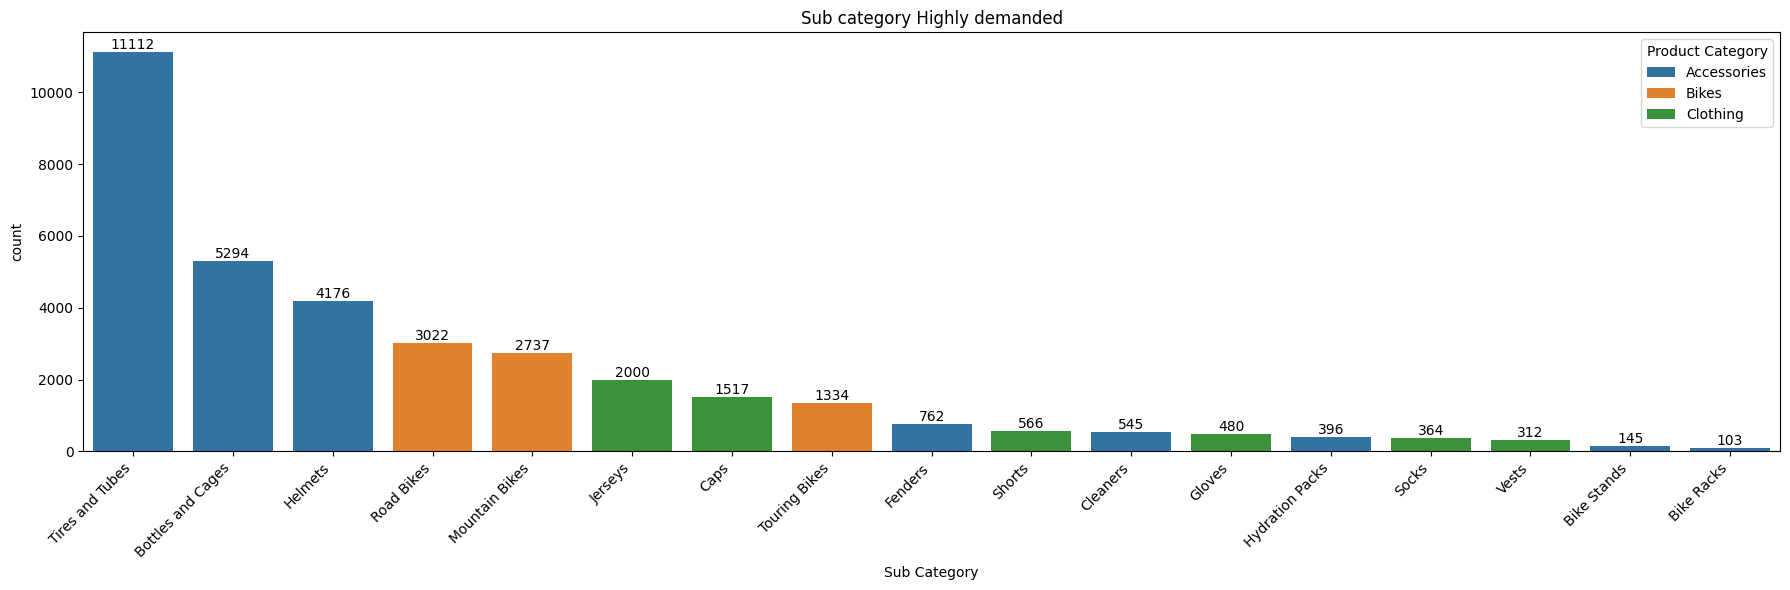

In [49]:
plt.figure(figsize=(18,6))
n=c[['Sub Category','Product Category']].value_counts().reset_index(name='count')
ax=sns.barplot(data=n,x=n['Sub Category'],y='count',hue=n['Product Category'])
for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=0)
    plt.xticks(rotation=45,ha='right')
    plt.tight_layout()
    plt.title('Sub category Highly demanded')

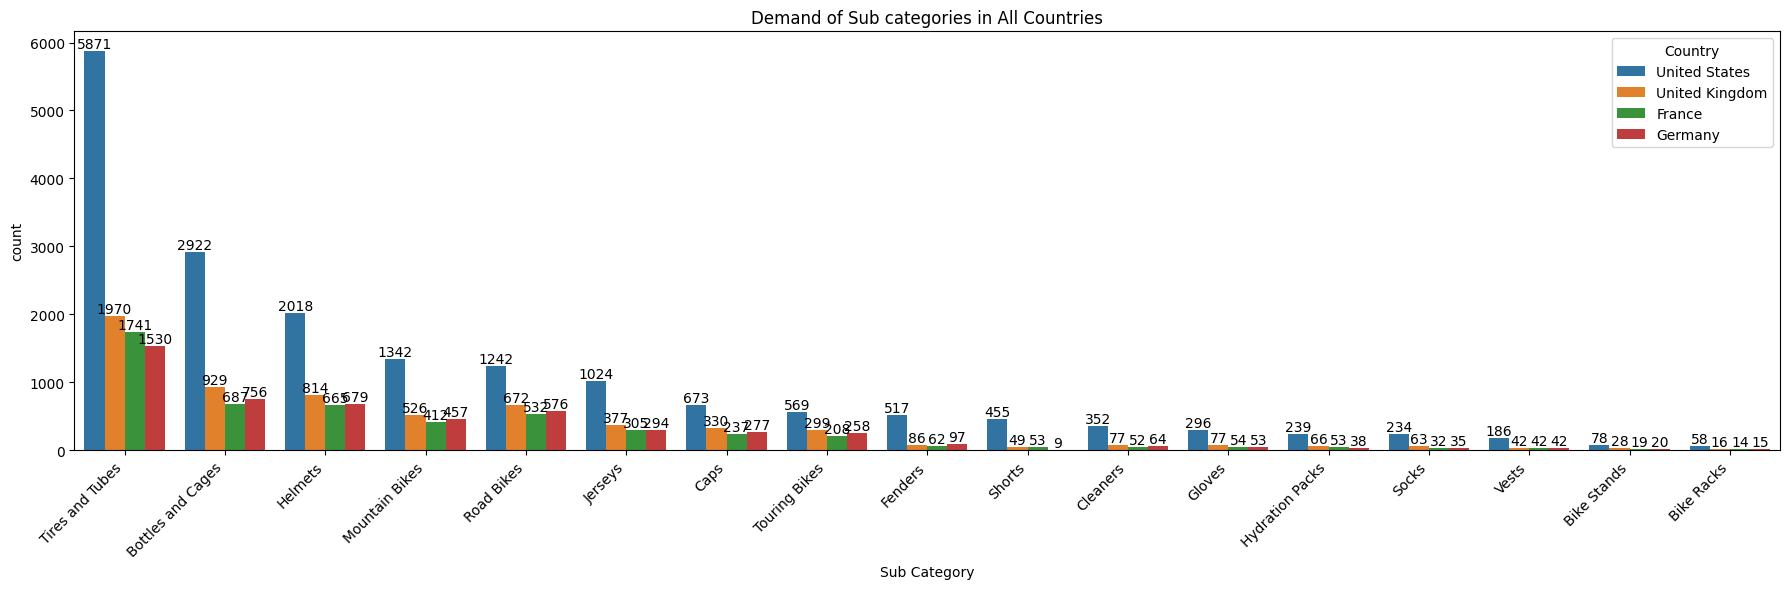

In [50]:
plt.figure(figsize=(18,6))
n=c[['Sub Category','Country']].value_counts().reset_index(name='count')
ax=sns.barplot(data=n,x=n['Sub Category'],y='count',hue=n['Country'])
for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=0)
    plt.xticks(rotation=45,ha='right')
    plt.tight_layout()
    plt.title('Demand of Sub categories in All Countries')

In [40]:
e=c[['Sub Category','State']].value_counts().reset_index(name='count')
e.head()

,Sub Category,State,count
0,Tires and Tubes,California,3236
1,Tires and Tubes,England,1970
2,Tires and Tubes,Washington,1778
3,Bottles and Cages,California,1695
4,Helmets,California,1134


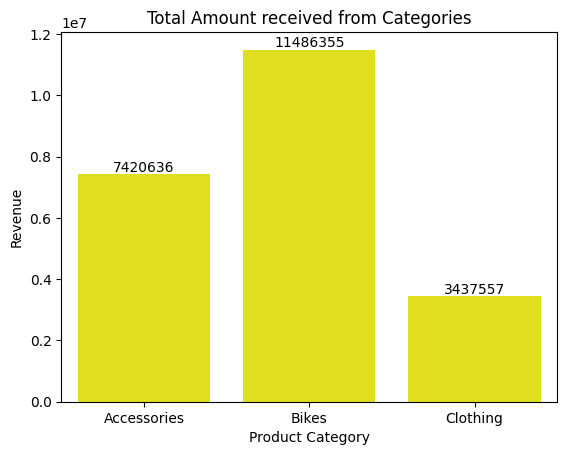

In [51]:
g=c.groupby('Product Category')['Revenue'].sum().reset_index()
ax=sns.barplot(data=g,x=g['Product Category'].astype(str),y=g['Revenue'],color='yellow')
for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=0)
    plt.title('Total Amount received from Categories')

##### There is more revenue in Bikes even is their sales are less than those of Accesories due to higher price per unit ,followed by Accesories and finally Clothing ,more promotions should be used in clothing so that their sales will be high 

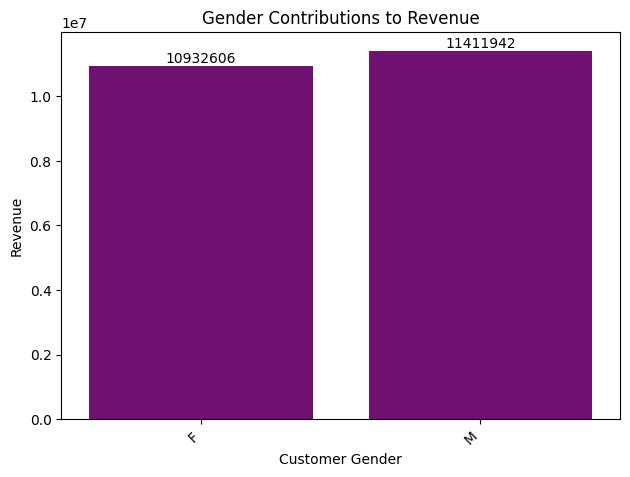

In [38]:
g=c.groupby('Customer Gender')['Revenue'].sum().reset_index()
ax=sns.barplot(data=g,x=g['Customer Gender'].astype(str),y=g['Revenue'],color='purple')
for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=0)
    plt.xticks(rotation=45,ha='right')
    plt.tight_layout()
    plt.title('Gender Contributions to Revenue')

##### Gender of all type contibutes to the revenues of the business

In [44]:
c.groupby('Customer Gender')['Revenue'].mean()

Customer Gender
F    640.832708
M    640.940298
Name: Revenue, dtype: float64

##### Both Gender contributes to to high of Sales of a business

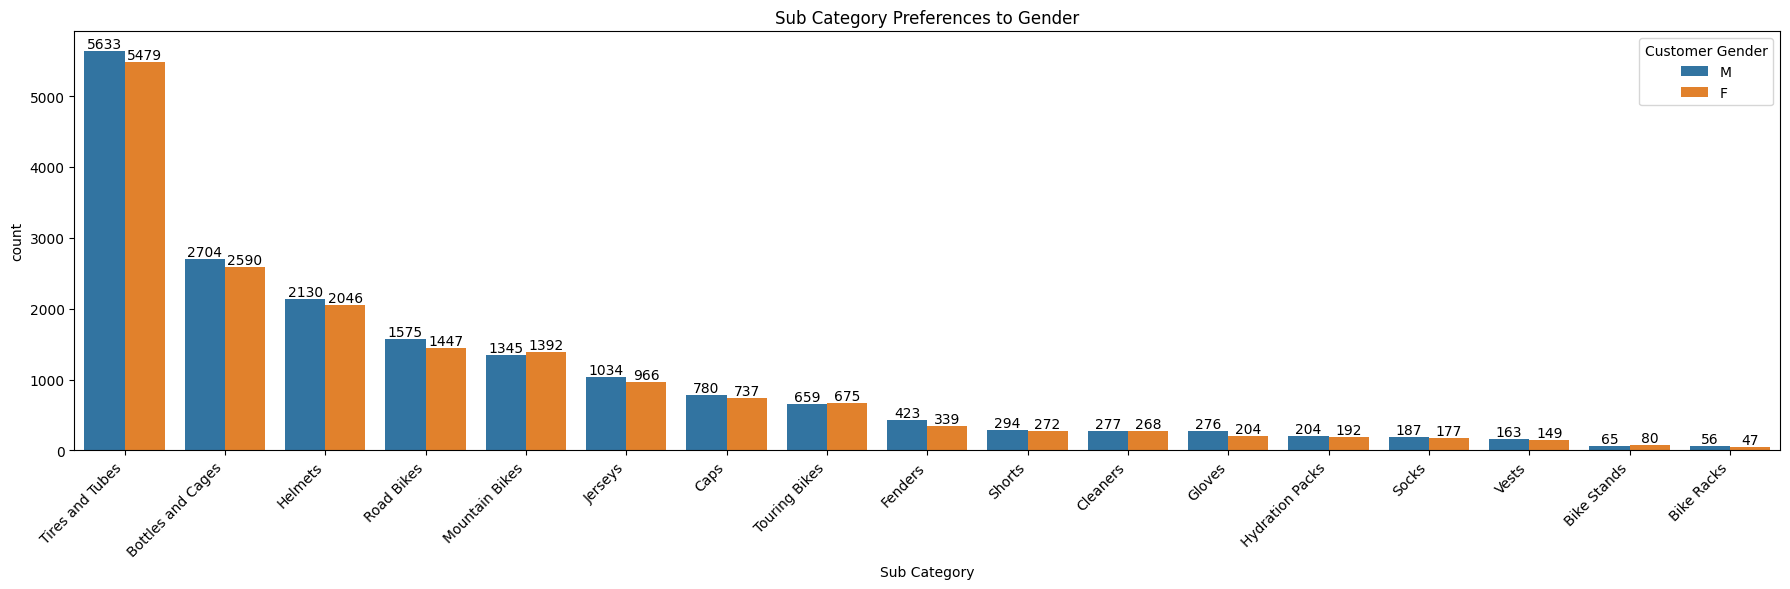

In [39]:
plt.figure(figsize=(18,6))
n=c[['Sub Category','Customer Gender']].value_counts().reset_index(name='count')
ax=sns.barplot(data=n,x=n['Sub Category'],y='count',hue=n['Customer Gender'])
for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=0)
    plt.xticks(rotation=45,ha='right')
    plt.tight_layout()
    plt.title('Sub Category Preferences to Gender')

##### All products are distributed and demanded to all customer gender ,so products should be available without targeting a gender to customers but mainlty to highly demanded products Tires and Tubes,Bottle and cages,helmets ,Bikes and jerseys

## Business Insights

- **Category Performance:** Accessories dominate transaction counts but yield lower margins. Clothing shows fewer transactions but higher profitability.  
- **Geographic Trends:** Washington and California drive the majority of revenue.  
- **Customer Segments:** 25–40 age group contributes most revenue, suggesting targeted campaigns.  
- **Profitability Risks:** Some transactions show negative profit—likely discounts or data errors.  
- **Seasonality:** Revenue peaks in June and December, aligning with promotional cycles.
- ## Recommendations

1. Expand marketing in high-revenue states (Washington, California).  
2. Focus promotions on Clothing to leverage higher margins.  
3. Target campaigns at 25–40 age group for maximum ROI.  
4. Investigate negative profit transactions to reduce leakage.  
5. Align promotions with seasonal peaks (June, December).

## Conclusion
This analysis highlights key drivers of revenue and profitability across customer segments, product categories, and geographies. 


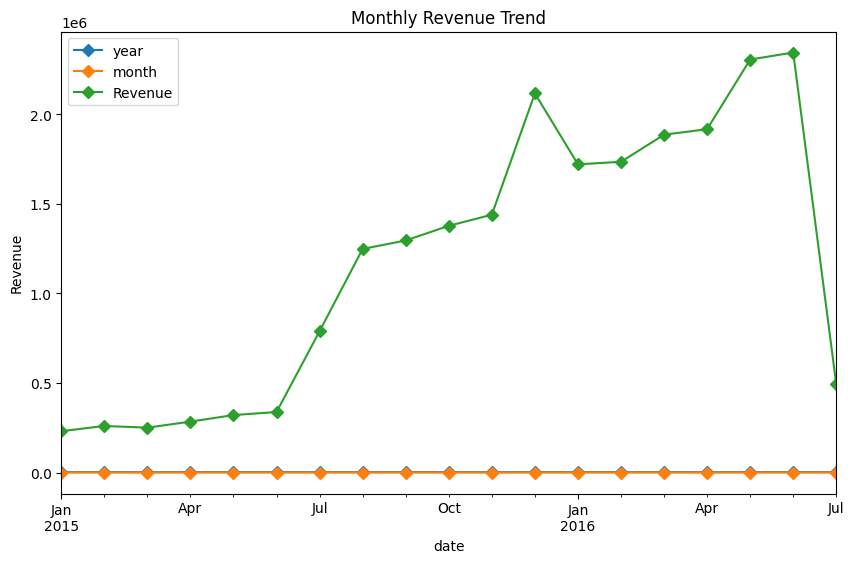

In [49]:
# Aggregate monthly revenue
monthly_rev = dfs.groupby(['year','month'])['Revenue'].sum().reset_index()

# Convert to datetime index
monthly_rev['date'] = pd.to_datetime(monthly_rev[['year','month']].assign(day=1))
monthly_rev = monthly_rev.set_index('date').sort_index()

monthly_rev.plot(figsize=(10,6), title="Monthly Revenue Trend",marker='D')
plt.ylabel("Revenue")
plt.show()



C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Temp\ipykernel_14796\2766303699.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_rev.index[-1], periods=12, freq='M'),


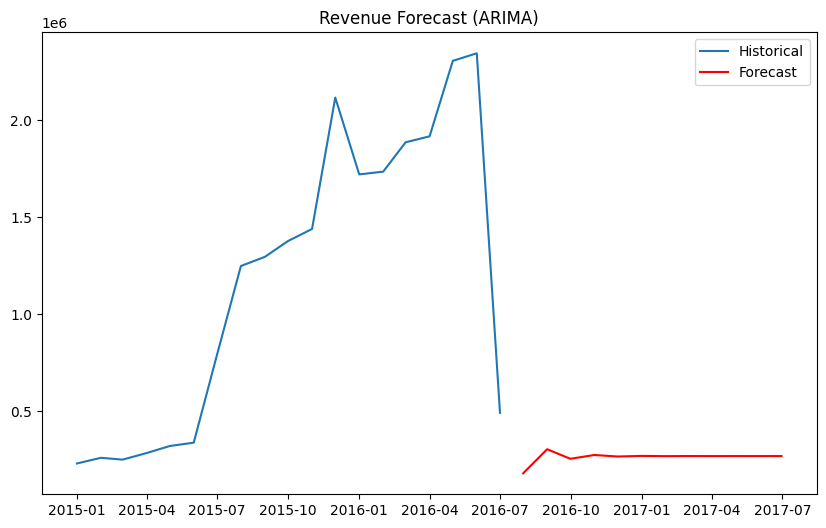

In [50]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(monthly_rev['Revenue'], order=(1,1,1))  # (p,d,q) tuned later
model_fit = model.fit()

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)

plt.figure(figsize=(10,6))
plt.plot(monthly_rev.index, monthly_rev['Revenue'], label='Historical')
plt.plot(pd.date_range(monthly_rev.index[-1], periods=12, freq='M'),
         forecast, label='Forecast', color='red')
plt.title("Revenue Forecast (ARIMA)")
plt.legend()
plt.show()


10:20:43 - cmdstanpy - INFO - Chain [1] start processing
10:20:44 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1875: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


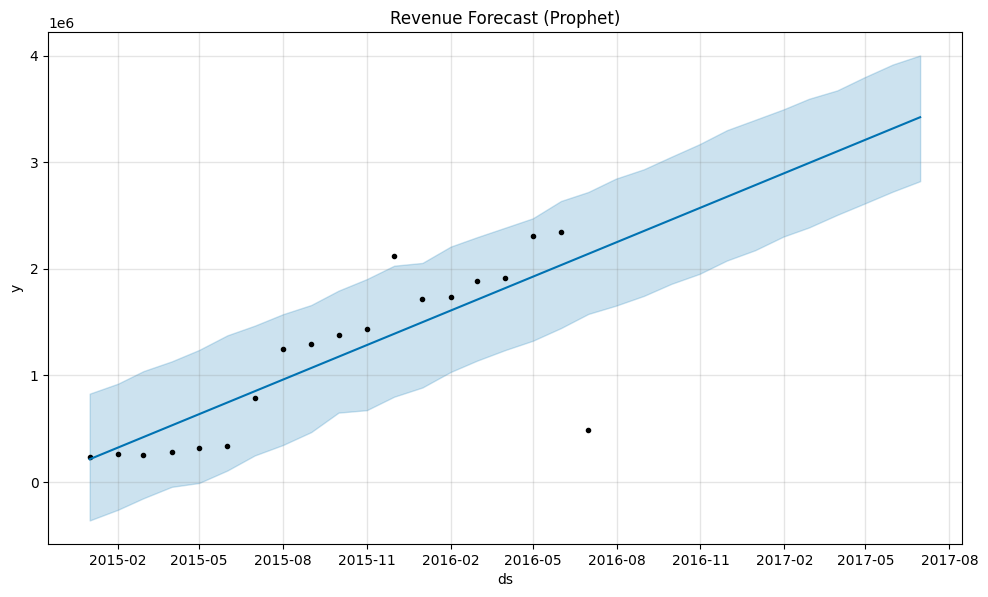

In [51]:
from prophet import Prophet

# Prepare data for Prophet
prophet_df = monthly_rev.reset_index()[['date','Revenue']]
prophet_df.columns = ['ds','y']

# Fit model
m = Prophet()
m.fit(prophet_df)

# Future dataframe
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

# Plot forecast
fig = m.plot(forecast)
plt.title("Revenue Forecast (Prophet)")
plt.show()


In [53]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, signif=0.05):
    """Perform ADF test and return p-value and stationarity flag."""
    result = adfuller(series.dropna(), autolag='AIC')
    p_value = result[1]
    return p_value, p_value < signif

def difference_until_stationary(series, signif=0.05, max_diff=5):
    """Automatically difference series until it becomes stationary."""
    diff_count = 0
    temp_series = series.copy()
    
    while diff_count < max_diff:
        p_value, stationary = adf_test(temp_series, signif)
        print(f"Diff={diff_count}, p-value={p_value:.4f}, Stationary={stationary}")
        
        if stationary:
            return temp_series, diff_count
        
        # Apply differencing
        temp_series = temp_series.diff().dropna()
        diff_count += 1
    
    print("Series did not become stationary within max_diff differencing.")
    return temp_series, diff_count

# Example usage on monthly revenue
stationary_series, d = difference_until_stationary(monthly_rev['Revenue'])
print(f"Final differencing order (d): {d}")


Diff=0, p-value=0.0131, Stationary=True
Final differencing order (d): 0


In [54]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(monthly_rev['Revenue'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Number of Lags Used:", result[2])
print("Number of Observations Used:", result[3])
print("Critical Values:", result[4])


ADF Statistic: -3.3428672343791224
p-value: 0.013067720278345326
Number of Lags Used: 7
Number of Observations Used: 11
Critical Values: {'1%': np.float64(-4.223238279489106), '5%': np.float64(-3.189368925619835), '10%': np.float64(-2.729839421487603)}


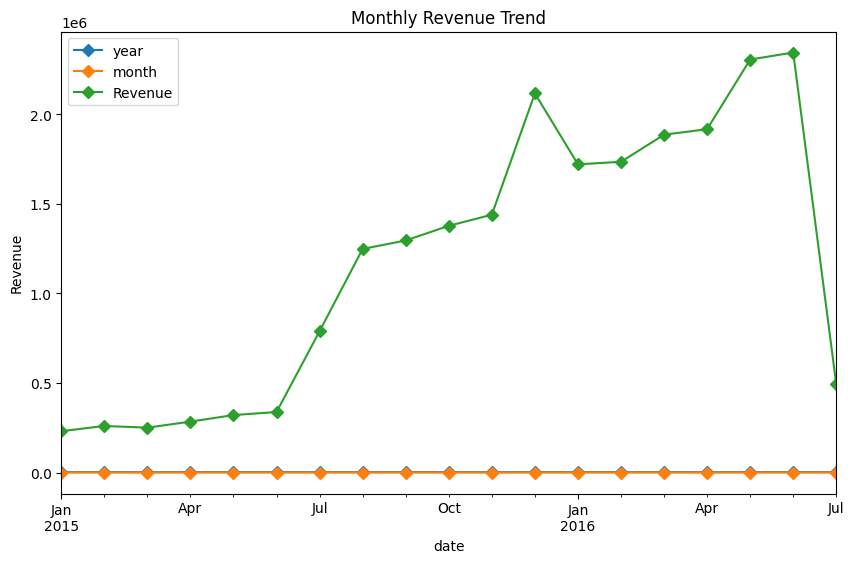

In [57]:
# Aggregate monthly revenue
monthly_rev = dfs.groupby(['year','month'])['Revenue'].sum().reset_index()

# Convert to datetime index
monthly_rev['date'] = pd.to_datetime(monthly_rev[['year','month']].assign(day=1))
monthly_rev = monthly_rev.set_index('date').sort_index()

# Plot trend
monthly_rev.plot(figsize=(10,6), title="Monthly Revenue Trend", marker='D')
plt.ylabel("Revenue")
plt.show()



In [61]:
# Train/Test split (example: split at 2015)
# Train/Test split by proportion
split_point = int(len(monthly_rev) * 0.8)

train = monthly_rev['Revenue'].iloc[:split_point]
test  = monthly_rev['Revenue'].iloc[split_point:]

print(train.head())
print('---'*20)
print(test.head())



date
2015-01-01    230549.0
2015-02-01    259857.0
2015-03-01    250358.0
2015-04-01    284143.0
2015-05-01    320629.0
Name: Revenue, dtype: float64
------------------------------------------------------------
date
2016-04-01    1916347.0
2016-05-01    2305191.0
2016-06-01    2344229.0
2016-07-01     491612.0
Name: Revenue, dtype: float64


In [62]:
print(train.describe())
print(train.head(20))


count    1.500000e+01
mean     1.019187e+06
std      6.930621e+05
min      2.305490e+05
25%      3.023860e+05
50%      1.248157e+06
75%      1.579500e+06
max      2.116097e+06
Name: Revenue, dtype: float64
date
2015-01-01    2.305490e+05
2015-02-01    2.598570e+05
2015-03-01    2.503580e+05
2015-04-01    2.841430e+05
2015-05-01    3.206290e+05
2015-06-01    3.377560e+05
2015-07-01    7.890540e+05
2015-08-01    1.248157e+06
2015-09-01    1.295246e+06
2015-10-01    1.376969e+06
2015-11-01    1.438928e+06
2015-12-01    2.116097e+06
2016-01-01    1.720072e+06
2016-02-01    1.734376e+06
2016-03-01    1.885620e+06
Name: Revenue, dtype: float64


In [63]:
from statsmodels.tsa.stattools import adfuller


if train.nunique() > 1:
    adf_result = adfuller(train)
    print("ADF Statistic:", adf_result[0])
    print("p-value:", adf_result[1])
else:
    print("Train series is constant – cannot run ADF.")



ADF Statistic: -0.5677986265883949
p-value: 0.8780934834662281


C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\AppData\Local\Programs\Pytho

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                   15
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -195.910
Date:                Wed, 11 Feb 2026   AIC                            401.820
Time:                        10:56:59   BIC                            405.016
Sample:                    01-01-2015   HQIC                           401.525
                         - 03-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3521      0.418     -0.842      0.400      -1.172       0.467
ar.L2         -0.9728      0.103     -9.439      0.000      -1.175      -0.771
ma.L1          0.4967      0.587      0.846      0.3

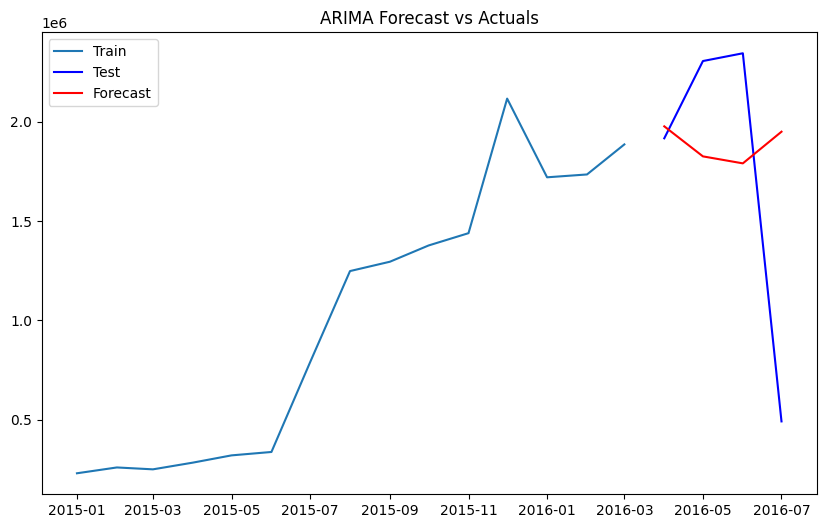

In [64]:
from statsmodels.tsa.arima.model import ARIMA

# Example ARIMA order (p,d,q) = (2,1,2)
model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title("ARIMA Forecast vs Actuals")
plt.legend()
plt.show()


In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 666624513034.5602
Mean Absolute Error: 637994.0873180996


In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Forecast on test set
forecast = model_fit.forecast(steps=len(test))

# MSE
mse = mean_squared_error(test, forecast)

# MAE
mae = mean_absolute_error(test, forecast)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((test - forecast) / test)) * 100

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape, "%")


Mean Squared Error (MSE): 666624513034.5602
Mean Absolute Error (MAE): 637994.0873180996
Mean Absolute Percentage Error (MAPE): 86.03941750256642 %


In [72]:
print(len(residuals))


15


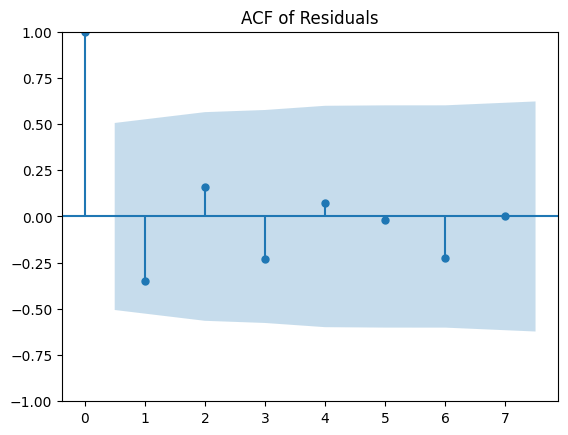

In [74]:
from statsmodels.graphics.tsaplots import plot_acf

# Safe lag selection
n_obs = len(residuals)
max_lags = min(20, n_obs // 2)   # half the sample size is a safe rule

plot_acf(residuals, lags=max_lags)
plt.title("ACF of Residuals")
plt.show()


### Executive Takeaway
##### Current ARIMA(2,1,2) forecasts are inaccurate (MAPE ~86%), indicating the model does not capture seasonality or volatility in revenue. To improve, we recommend auto-ARIMA or SARIMA with monthly seasonality, and expanding the training set to strengthen predictive power.

###### Residual diagnostics confirm whether the ARIMA model has captured the underlying patterns. By plotting the autocorrelation of residuals, we check if they resemble random noise. If they do, the model is sound. If not, further refinement is needed.”